Imports and data uploads
-----------

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.simplefilter('ignore')
import os
from scipy import stats
import colorcet as cc
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

In [2]:
# upload data
cpath = os.getcwd() #assumes scalar_df_females is in the same path as the notebook
scalar_df = pd.read_csv(cpath+'/scalar_df_female.csv')
scalar_df_subset=scalar_df.copy()

# ----------------------------------------------------------------------- 
# ANALYSIS
# -----------------------------------------------------------------------

In [3]:
# plot/colors definitions
data_loc=cpath+'/figs/'
try:
    os.mkdir(data_loc)
except FileExistsError:
    # directory already exists
    pass

plt.style.use("seaborn-paper")
phasec = ['#CE3045','#EF7C32','#FFDD00','#939598']
cmap2 = cc.glasbey

## calculate time in center per phase

In [4]:
# convert px to mm
pxmm = scalar_df_subset.area_mm.mean()/scalar_df_subset.area_px.mean()
scalar_df_subset['dist_center_mm'] = scalar_df_subset['dist_to_center_px']*pxmm

In [5]:
from collections import Counter
fps = 30
scalar_df_subset['center_time']=0
thresh_dist = 110
dist_df = scalar_df_subset[scalar_df_subset['dist_center_mm']<thresh_dist]
a = Counter(dist_df['SubjectName']).items()
# match time in center to specific session
for i in a:
    scalar_df_subset.center_time[scalar_df_subset.SubjectName==i[0]] = i[1]/fps #convert to time in sec

## calculate scalars

In [6]:
scalar_mean = scalar_df_subset.groupby(['group','mouse','rep'], as_index=False).mean()

# convert mm to mm/sec
scalar_mean['velocity_2d_mm'] = scalar_mean['velocity_2d_mm']*fps
scalar_mean['velocity_3d_mm'] = scalar_mean['velocity_3d_mm']*fps

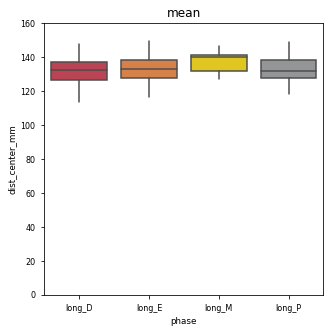

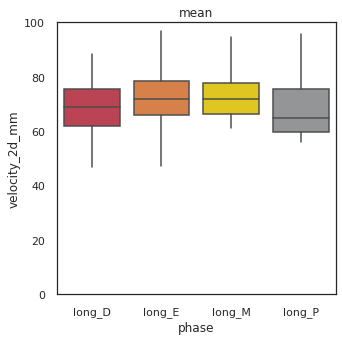

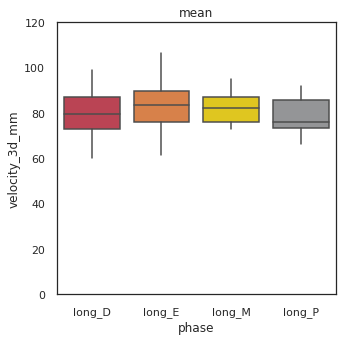

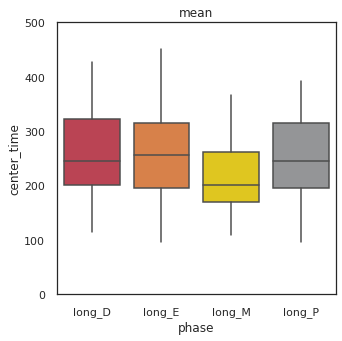

In [7]:
m = 'dist_center_mm'
fig, axs = plt.subplots(1,1, figsize=(5, 5))
sns.set_theme(style="white")
sns.boxplot(ax= axs, x = 'group', y = m, data=scalar_mean, showfliers=False,showcaps=False, palette=phasec)
axs.set_title('mean')
axs.set_xlabel('phase')
axs.set_ylim(bottom=0)
axs.set_ylim([0,160])
fig.savefig(data_loc +'phase_'+m+'.pdf', bbox_inches='tight')

m = 'velocity_2d_mm'
fig, axs = plt.subplots(1,1, figsize=(5, 5))
sns.set_theme(style="white")
sns.boxplot(ax= axs, x = 'group', y = m, data=scalar_mean, showfliers=False,showcaps=False, palette=phasec)
axs.set_title('mean')
axs.set_xlabel('phase')
axs.set_ylim(bottom=0)
axs.set_ylim([0,100])
fig.savefig(data_loc +'phase_'+m+'.pdf', bbox_inches='tight')

m = 'velocity_3d_mm'
fig, axs = plt.subplots(1,1, figsize=(5, 5))
sns.set_theme(style="white")
sns.boxplot(ax= axs, x = 'group', y = m, data=scalar_mean, showfliers=False,showcaps=False, palette=phasec)
axs.set_title('mean')
axs.set_xlabel('phase')
axs.set_ylim(bottom=0)
axs.set_ylim([0,120])
fig.savefig(data_loc +'phase_'+m+'.pdf', bbox_inches='tight')


m = 'center_time'
fig, axs = plt.subplots(1,1, figsize=(5, 5))
sns.set_theme(style="white")
sns.boxplot(ax= axs, x = 'group', y = m, data=scalar_mean, showfliers=False,showcaps=False, palette=phasec)
axs.set_title('mean')
axs.set_xlabel('phase')
axs.set_ylim(bottom=0)
axs.set_ylim([0,500])
fig.savefig(data_loc +'phase_'+m+'.pdf', bbox_inches='tight')

In [8]:
phase_scalars = scalar_mean[['mouse','group','rep','velocity_3d_mm','velocity_2d_mm','dist_center_mm','center_time']]

# scalars per mouse

In [9]:
scalar_mean = scalar_df_subset.groupby(['mouse', 'rep'], as_index=False).mean()

# convert mm to mm/sec
scalar_mean['velocity_2d_mm'] = scalar_mean['velocity_2d_mm']*30
scalar_mean['velocity_3d_mm'] = scalar_mean['velocity_3d_mm']*30

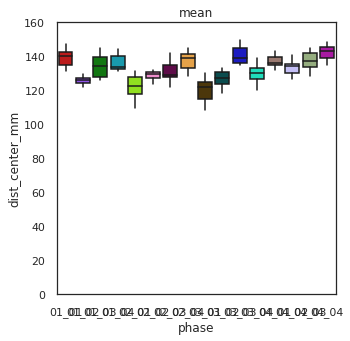

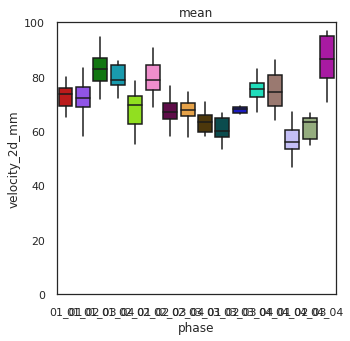

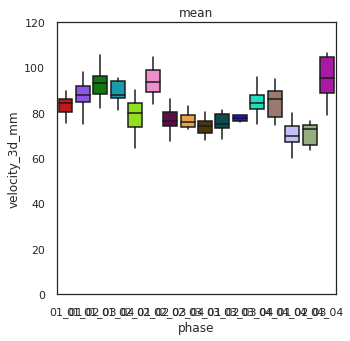

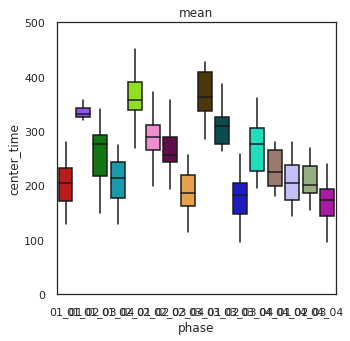

In [10]:
m = 'dist_center_mm'
fig, axs = plt.subplots(1,1, figsize=(5, 5))
sns.set_theme(style="white")

sns.boxplot(ax= axs, x = 'mouse', y = m, data=scalar_mean,showfliers=False,showcaps=False, palette=cmap2)
axs.set_title('mean')
axs.set_xlabel('phase')
axs.set_ylim(bottom=0)
axs.set_ylim([0,160])
plt.show()
fig.savefig(data_loc +'indv_'+m+'.pdf', bbox_inches='tight')

m = 'velocity_2d_mm'
fig, axs = plt.subplots(1,1, figsize=(5, 5))
sns.set_theme(style="white")
sns.boxplot(ax= axs, x = 'mouse', y = m, data=scalar_mean,showfliers=False,showcaps=False, palette=cmap2)
axs.set_title('mean')
axs.set_xlabel('phase')
axs.set_ylim(bottom=0)
axs.set_ylim([0,100])
plt.show()
fig.savefig(data_loc +'indv_'+m+'.pdf', bbox_inches='tight')

m = 'velocity_3d_mm'
fig, axs = plt.subplots(1,1, figsize=(5, 5))
sns.set_theme(style="white")

sns.boxplot(ax= axs, x = 'mouse', y = m, data=scalar_mean,showfliers=False,showcaps=False, palette=cmap2)
axs.set_title('mean')
axs.set_xlabel('phase')
axs.set_ylim(bottom=0)
axs.set_ylim([0,120])
plt.show()
fig.savefig(data_loc +'indv_'+m+'.pdf', bbox_inches='tight')

m = 'center_time'
fig, axs = plt.subplots(1,1, figsize=(5, 5))
sns.set_theme(style="white")

sns.boxplot(ax= axs, x = 'mouse', y = m, data=scalar_mean,showfliers=False,showcaps=False, palette=cmap2)
axs.set_title('mean')
axs.set_xlabel('phase')
axs.set_ylim(bottom=0)
axs.set_ylim([0,500])
plt.show()
fig.savefig(data_loc +'indv_'+m+'.pdf', bbox_inches='tight')

In [11]:
indv_scalars = scalar_mean[['mouse','rep','velocity_3d_mm','velocity_2d_mm','dist_center_mm','center_time']]

# Compute total distance traveled

In [12]:
def compute_diff_dist(scalar_df: pd.DataFrame):
    scalar_df = scalar_df[['centroid_x_mm', 'centroid_y_mm']].dropna()
    return np.sqrt((scalar_df[['centroid_x_mm', 'centroid_y_mm']].diff()**2).sum(1)).sum()/1000
dist_df = scalar_df_subset.groupby(by=['group', 'mouse','rep']).apply(compute_diff_dist).reset_index()
dist_df = dist_df.rename(columns={0:'dist_traveled'})

In [13]:
phase_mouse=dist_df.groupby(['group', 'mouse','rep']).mean().reset_index()

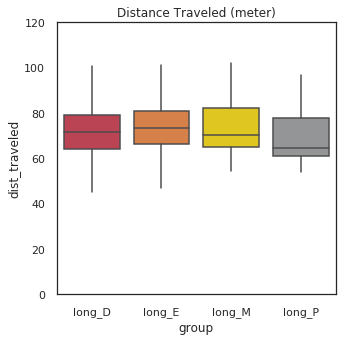

In [14]:
fig, axs = plt.subplots(1,1, figsize=(5, 5))
sns.set_theme(style="white")
sns.boxplot(ax= axs, x = 'group', y ='dist_traveled', data=phase_mouse,showfliers=False,showcaps=False, palette=phasec)
axs.set_title('Distance Traveled (meter)')
axs.set_xlabel('group')
axs.set_ylim([0,120])
fig.savefig(data_loc +'phase_distance_traveled.pdf', bbox_inches='tight')

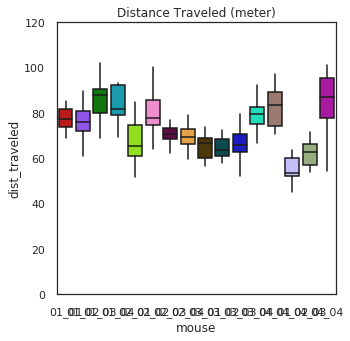

In [15]:
fig, axs = plt.subplots(1,1, figsize=(5, 5))
sns.set_theme(style="white")
sns.boxplot(ax= axs, x = 'mouse', y ='dist_traveled', data=phase_mouse,showfliers=False,showcaps=False, palette=cmap2)
axs.set_title('Distance Traveled (meter)')
axs.set_xlabel('mouse')
axs.set_ylim([0,120])
fig.savefig(data_loc +'indv_distance_traveled.pdf', bbox_inches='tight')

In [16]:
phase_scalars['dist_traveled'] = phase_mouse['dist_traveled']

# statistics

In [17]:
# get ANOVA table as R like output
# for phase:
phases = phase_scalars.group.unique()
scalars = ['velocity_3d_mm','velocity_2d_mm','dist_center_mm','center_time', 'dist_traveled']
mice = phase_scalars.mouse.unique()

print('phase')
#phase statistics
for s in scalars:
    d=[]
    for p in phases:
        d.append(phase_scalars[phase_scalars.group==p][s].to_numpy())
    print ('phase ',s)
    print(stats.kruskal(d[0],d[1],d[2],d[3]))

print('indv')
#indv statistics
for s in scalars:
    d=[]
    for p in mice:
        d.append(phase_scalars[phase_scalars.mouse==p][s].to_numpy())
    print ('indv ',s)
    print(stats.kruskal(d[0],d[1],d[2],d[3],d[4],d[5],d[6],d[7],d[8],d[9],d[10],d[11],d[12],d[13],d[14],d[15]))

phase
phase  velocity_3d_mm
KruskalResult(statistic=5.474583381901994, pvalue=0.14016674055652273)
phase  velocity_2d_mm
KruskalResult(statistic=5.568412520409765, pvalue=0.13460357094855846)
phase  dist_center_mm
KruskalResult(statistic=5.276723201147092, pvalue=0.15261993826008935)
phase  center_time
KruskalResult(statistic=4.196364246737588, pvalue=0.24102614519734372)
phase  dist_traveled
KruskalResult(statistic=3.585552667285583, pvalue=0.3098345617715173)
indv
indv  velocity_3d_mm
KruskalResult(statistic=125.0938725602756, pvalue=1.9328903680866944e-19)
indv  velocity_2d_mm
KruskalResult(statistic=128.80340998305178, pvalue=3.645778122564852e-20)
indv  dist_center_mm
KruskalResult(statistic=128.44452681646726, pvalue=4.28524440330786e-20)
indv  center_time
KruskalResult(statistic=133.66419819143064, pvalue=4.065811182052436e-21)
indv  dist_traveled
KruskalResult(statistic=118.88543015690789, pvalue=3.1130895036847375e-18)
